# Visualization (cont.)
## Multiple plots, figure, subplot

`pyplot.subplots` creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

`subplots()` without arguments returns a Figure and a single Axes.

**NOTE:** This is actually the simplest and recommended way of creating a single Figure and Axes.

**NOTE:** The semicolon at the end of the last line is used to prevent output from that line. This is common in IPython or Jupyter notebooks

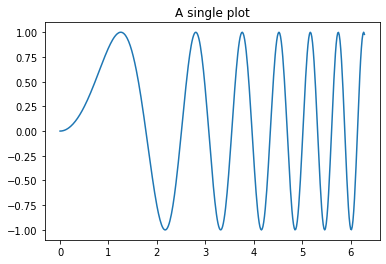

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot');

The first two optional arguments of `pyplot.subplots` define the number of rows and columns of the subplot grid.

When stacking in one direction only, the returned axs is a 1D numpy array containing the list of created Axes.

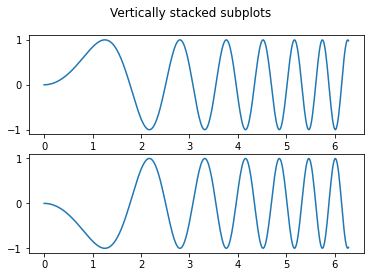

In [2]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);

If you are creating just a few Axes, it's handy to unpack them immediately to dedicated variables for each Axes. That way, we can use `ax1` instead of the more verbose `axs[0]`.

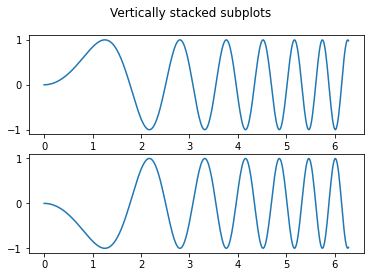

In [3]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y);
ax2.plot(x, -y);

To obtain side-by-side subplots, pass parameters 1, 2 for one row and two columns.

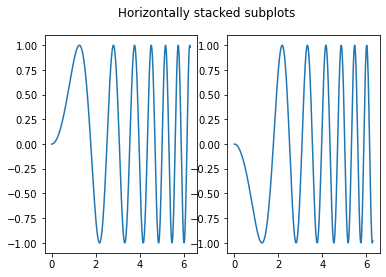

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y);

When stacking in two directions, the returned `axs` is a 2D NumPy array.

**NOTE:** If you have to set parameters for each subplot it's handy to iterate over all subplots in a 2D grid using `for ax in axs.flat:`.

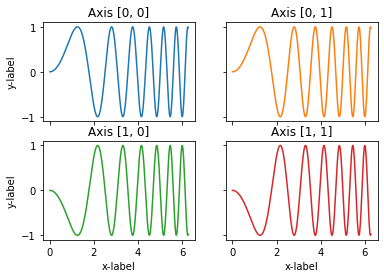

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

You can use tuple-unpacking also in 2D to assign all subplots to dedicated variables:

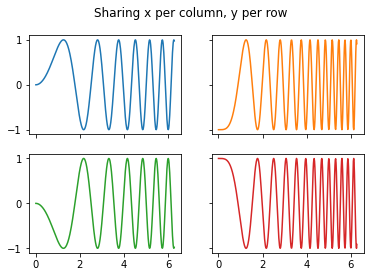

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

bove we have used `label_outer()` to show only "outer" labels and tick labels: x-labels are only kept for subplots on the last row; y-labels only for subplots on the first column.

### Sharing axes
By default, each Axes is scaled individually. Thus, if the ranges are different the tick values of the subplots do not align.

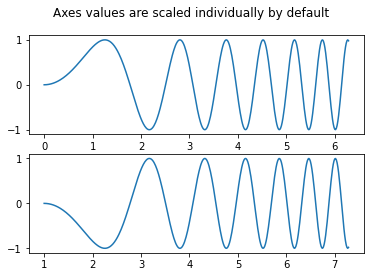

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y);

You can use sharex or sharey to align the horizontal or vertical axis.

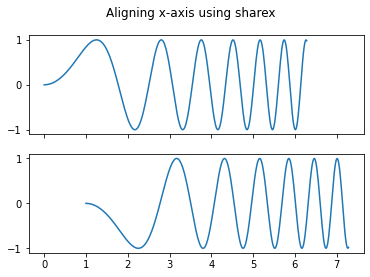

In [8]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y);

### Combining two subplots

Sometimes we want to combine two subplots in an axes layout created with subplots. We can get the `GridSpec` from the axes and then remove the covered axes and fill the gap with a new bigger axes. Here we create a layout with the bottom two axes in the last column combined.

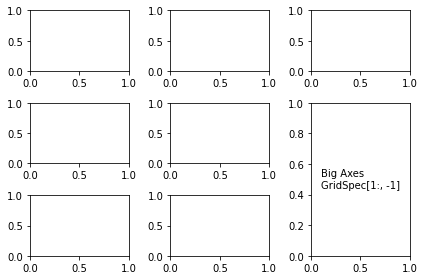

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[1, 2].get_gridspec()
# remove the underlying axes
for ax in axs[1:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')
fig.tight_layout()


**exercise:** plot $sin(x)$ and $cos(x)$ next to each other and below stretched over both columns $sin(2x)$. 

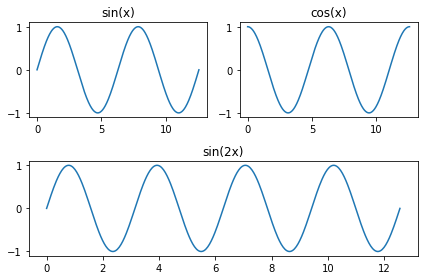

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=2)
gs = axs[1, 1].get_gridspec()
# remove the underlying axes
for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

# Some example data to display
x = np.linspace(0, 4 * np.pi, 400)
axs[0,0].plot(x,np.sin(x));
axs[0,0].set_title('sin(x)');
axs[0,1].plot(x,np.cos(x));
axs[0,1].set_title('cos(x)');
axbig.plot(x,np.sin(2*x));
axbig.set_title('sin(2x)');
fig.tight_layout()

## plotting functions using fplot

compare:

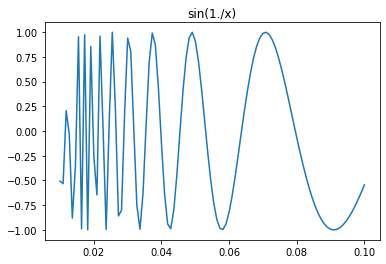

In [11]:
x = np.linspace(0.01,0.1,100);

fig, ax = plt.subplots()
ax.plot(x, np.sin(1./x))
ax.set_title('sin(1./x)');

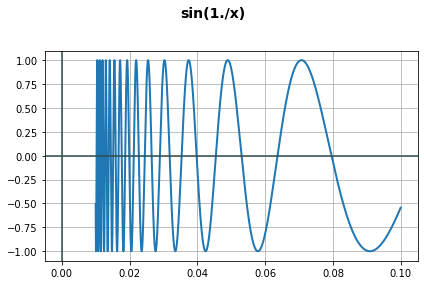

In [12]:
#!pip install fplot
import fplot
f = lambda x: np.sin(1./x)
fplot.plot(f, 0.01, 0.1, title='sin(1./x)')

parametric plot:

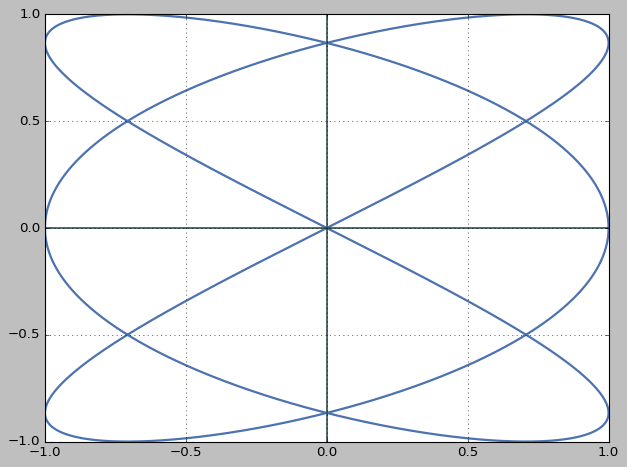

In [13]:
h = lambda t: (np.cos(3*t), np.sin(2*t))
fplot.parametric(h, 0, 2*np.pi)

## discrete data plots, scatter, stairs, stem

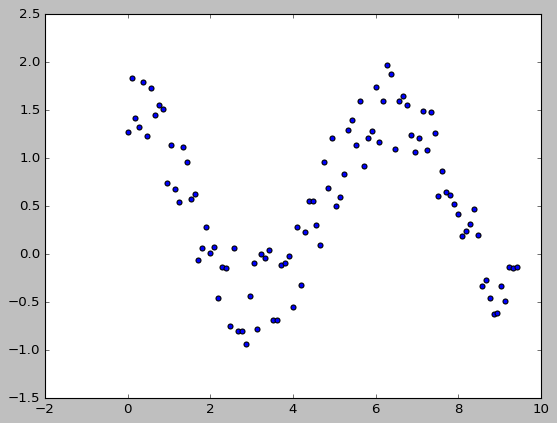

In [14]:
x = np.linspace(0, 3*np.pi, 100)
y = np.cos(x) + np.random.uniform(0, 1, 100)
plt.scatter(x, y);

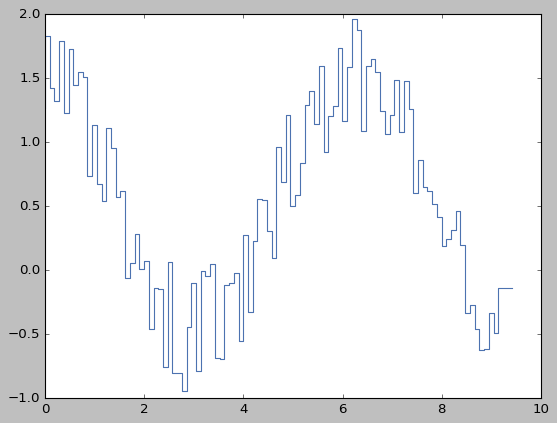

In [15]:
plt.step(x, y);

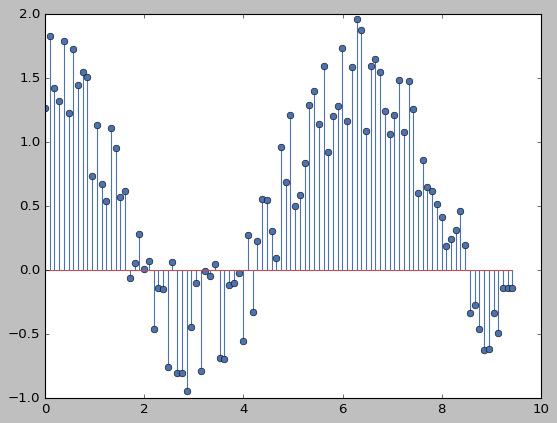

In [16]:
plt.stem(x, y);

**Example:** a two-dimensional difference equation

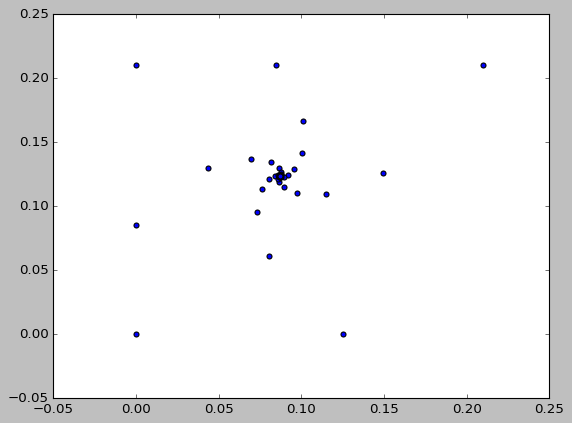

In [17]:
n=1000
x=np.zeros(n)
y=np.zeros(n)
for k in np.arange(n-1):
    x[k+1] = y[k]*(1 + np.sin(0.7*x[k]) - 1.2*np.sqrt(np.abs(x[k])))
    y[k+1] = 0.21 - x[k]
plt.scatter(x, y);

## log plots, error bar plots

log plots:

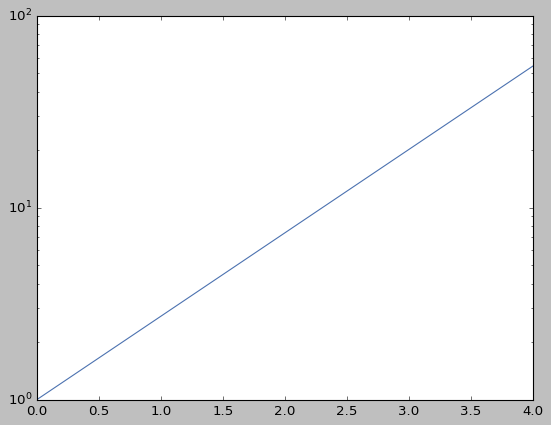

In [18]:
x = np.linspace(0, 4, 400)
plt.semilogy(x,np.exp(x)); # only y axis logarithmically spaced

/var/folders/q3/x4m21yzx5zg2bqzxxrmym06m0000gn/T/ipykernel_48017/2836500814.py:1: RuntimeWarning: divide by zero encountered in log
  plt.semilogx(x,np.log(x)); # only x axis logarithmically spaced


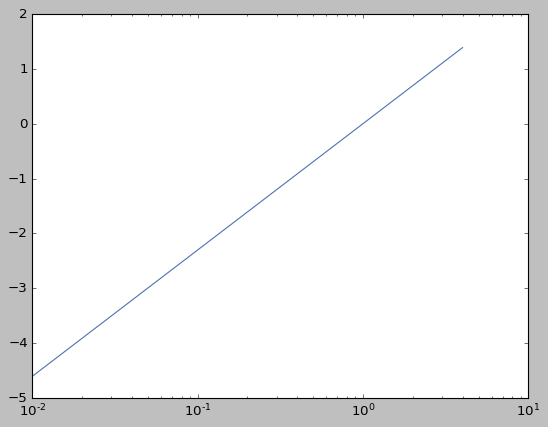

In [19]:
plt.semilogx(x,np.log(x)); # only x axis logarithmically spaced

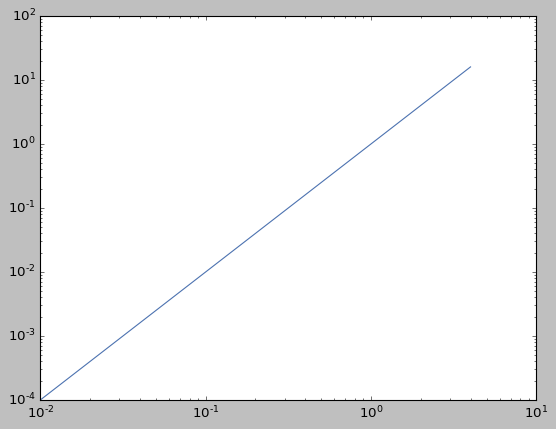

In [20]:
plt.loglog(x,x**2); # both axis logarithmically spaced

error bar plots:

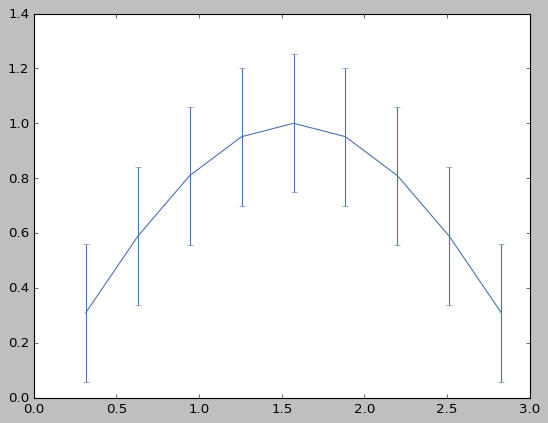

In [21]:
x = np.arange(np.pi/10, np.pi, np.pi/10)
y = np.sin(x)
e = np.std(y)*np.ones(x.size)
plt.errorbar(x, y, e);

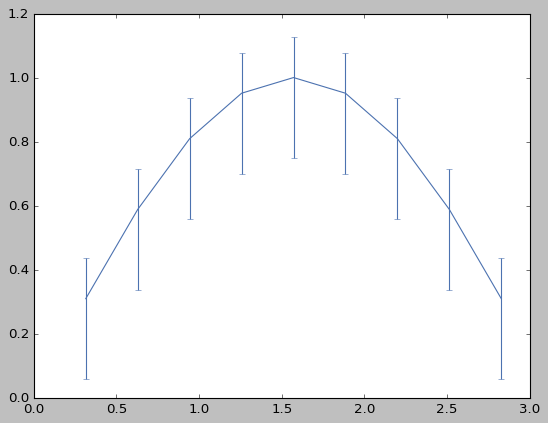

In [22]:
pos = np.std(y)*np.ones(x.size)
neg = .5 * pos
plt.errorbar(x, y, [pos, neg]);

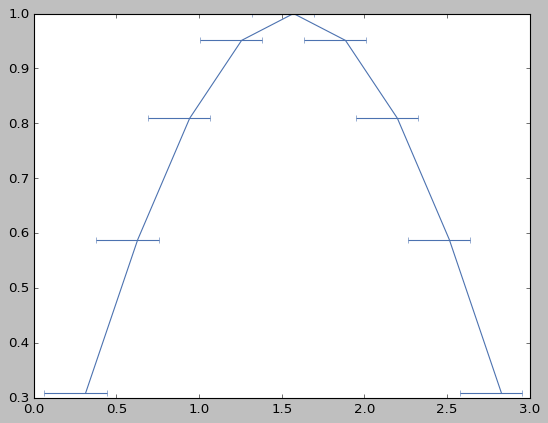

In [23]:
plt.errorbar(x, y, None, [pos, neg]);

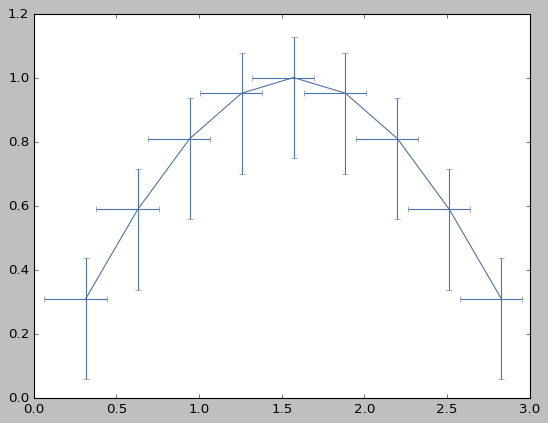

In [24]:
plt.errorbar(x, y, [pos, neg], [pos, neg]);

## pie and bar plots, histograms
pie plot:

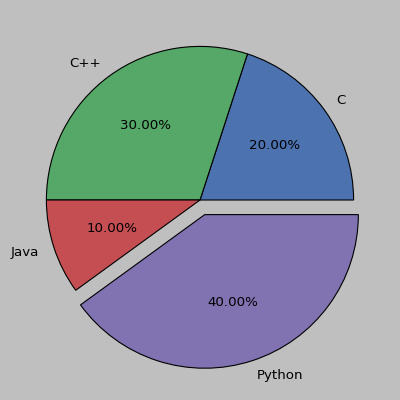

In [25]:
X = [20, 30, 10, 40]
langs = ['C', 'C++', 'Java', 'Python']
explode = [0, 0, 0, .1]
plt.pie(X, explode, labels = langs,autopct='%1.2f%%');

bar plot:

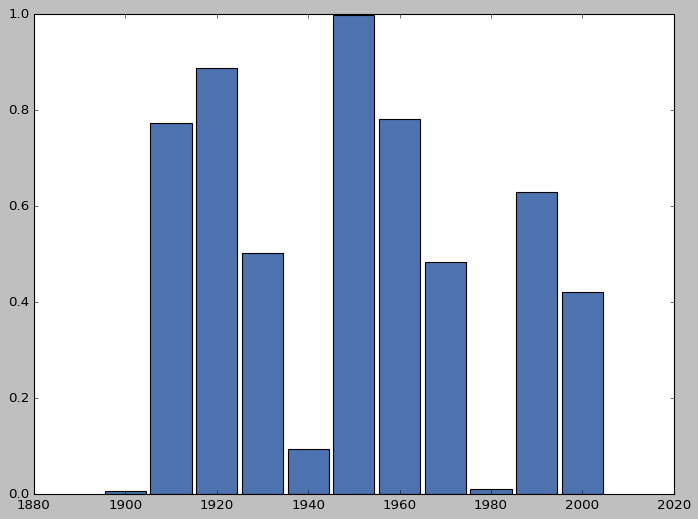

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.linspace(1900, 2000, 11)
y = np.random.uniform(0, 1, 11)
ax.bar(x, y, width = 9)
plt.show()

histogram:

0.024799523773480516
0.003151917840612306


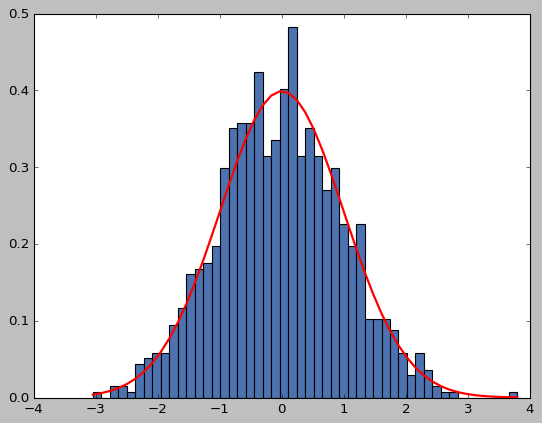

In [27]:
# Draw samples from the distribution:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Verify the mean and the variance:
print (abs(mu - np.mean(s)))
print (abs(sigma - np.std(s, ddof=1)))

# Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## polar plots

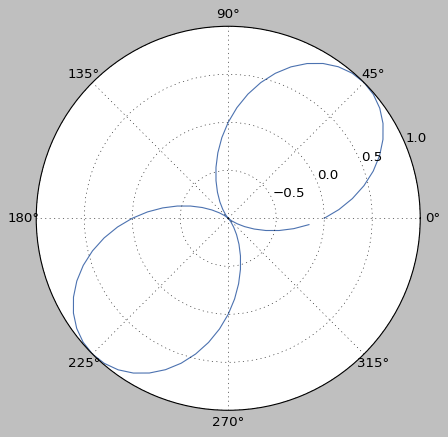

In [28]:
x = np.arange(0, 2*np.pi, np.pi/40)
plt.polar(x, np.sin(2*x));

**Example:** Draw a sunflower using polarscatter. The nth seed has polar coordinates $r=\sqrt{n}$, $\theta=\frac{dn\pi}{180}$

Try different values $d=137.45,137.51,137.92$

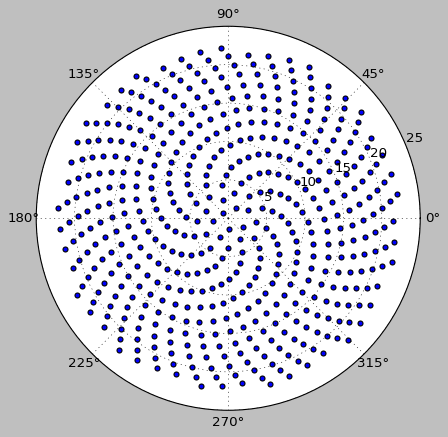

In [29]:
d = 137.92
n = np.arange(1,500)
r = np.sqrt(n)
theta = d*n*np.pi/180

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(theta,r);

[compass](https://ocefpaf.github.io/python4oceanographers/blog/2015/02/09/compass/) can be used to display complex eigenvalues:

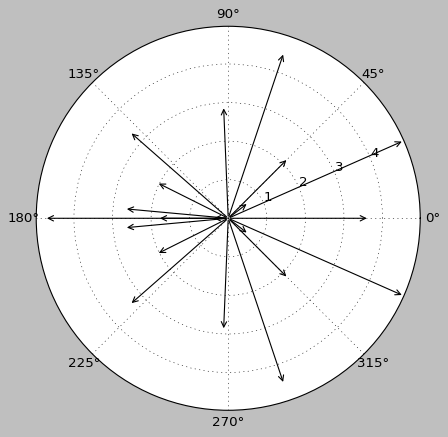

In [30]:
M = np.random.normal(size=[20,20])
Z = np.linalg.eigvals(M)

def cart2pol(x, y):
    """Convert from Cartesian to polar coordinates.

    Example
    -------
    >>> theta, radius = pol2cart(x, y)
    """
    radius = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return theta, radius

def compass(u, v, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    angles, radii = cart2pol(u, v)

    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

fig, ax = compass(Z.real, Z.imag)

## editing plots, saving, printing and exporting

In [31]:
%pylab

Using matplotlib backend: <object object at 0x10c644bd0>
Populating the interactive namespace from numpy and matplotlib


/Users/bochmann/Library/Caches/pypoetry/virtualenvs/math-so-rqA8CpC9-py3.9/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['save', 'f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [34]:
x = np.random.normal(size=10000)
plt.hist(x, 100);